# Task 1



1. Create a random 4x4 array from an exponential distribution. Refer numpy functions.



In [4]:
import numpy as np

# Set the scale parameter (lambda inverse)
scale = 1.0

# Generate a 4x4 array from an exponential distribution
random_array = np.random.exponential(scale, (4, 4))

print(random_array)

[[0.11471348 0.68579011 2.62114089 0.08541544]
 [0.19562206 1.4408666  0.39551241 0.82417584]
 [0.24022526 0.99866072 0.97388932 2.15059653]
 [0.26460654 0.50502526 0.32920338 0.88332878]]


2. Create a random 100000x1 array from the same exponential distribution and visualize the distribution histogram along with uniform and normal distributions. Use the code given below and do the necessary changes. Change the number of bins and the plot view to make the visualization better.



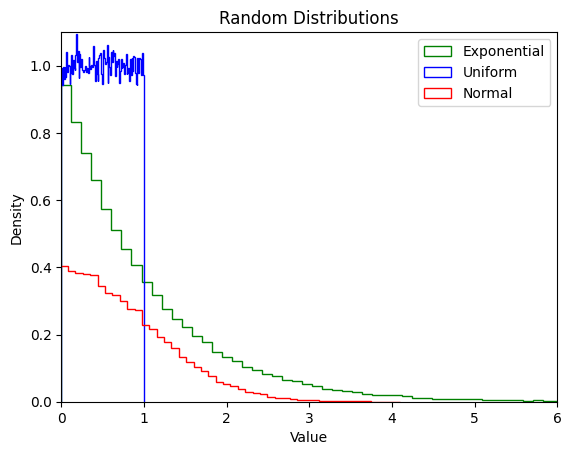

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set the scale parameter for the exponential distribution
scale = 1.0

# Generate a 100000x1 array from an exponential distribution
exponential_data = np.random.exponential(scale, 100000)

# Generate a 100000x1 array from a uniform distribution (0,1)
uniform_data = np.random.rand(100000)

# Generate a 100000x1 array from a normal distribution (mean=0, std=1)
normal_data = np.random.normal(0, 1, 100000)

# Plot histograms of the three distributions
plt.hist(exponential_data, density=True, bins=100, histtype="step", color="green", label="Exponential")
plt.hist(uniform_data, density=True, bins=100, histtype="step", color="blue", label="Uniform")
plt.hist(normal_data, density=True, bins=100, histtype="step", color="red", label="Normal")

# Set axis limits to better visualize the data
plt.axis([0, 6, 0, 1.1])  # Adjusted the x-axis range to better fit the exponential distribution

# Add legend, title, and labels
plt.legend(loc="upper right")
plt.title("Random Distributions")
plt.xlabel("Value")
plt.ylabel("Density")

# Show the plot
plt.show()


3. Using matplotlib, plot the Z = X**2 + Y**2 in a 3D plot. Limit the x and y values to [-5, 5






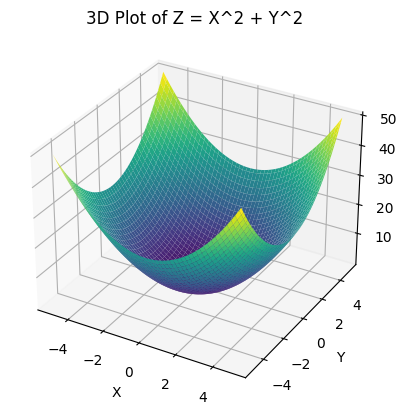

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Compute Z values based on X and Y
Z = X**2 + Y**2

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of Z = X^2 + Y^2')

# Show the plot
plt.show()


4. . Calculate the pearson standard coefficient and spearman rank correlation for the [HP,
Attack, Defense, Sp. Ark, Sp. Def, Speed] features in the seaborn tutorial.ipynb. Visualize the
results using heatmaps. Make sure the values are displaced in the heatmap as well.


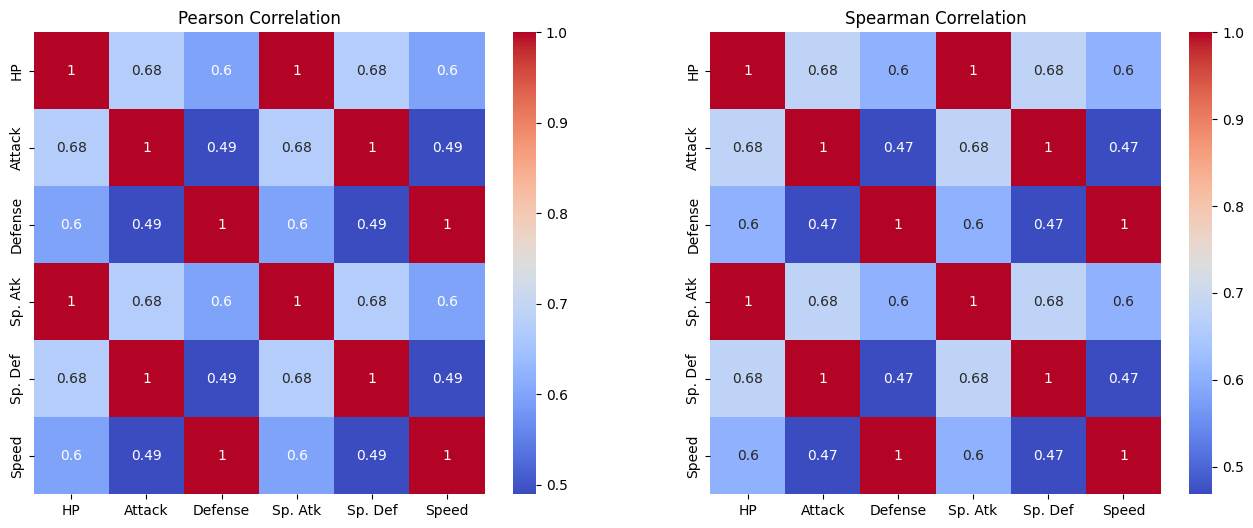

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the 'tips' dataset
df = sns.load_dataset('tips')

# Manually create columns to simulate HP, Attack, Defense, Sp. Atk, Sp. Def, Speed
df['HP'] = df['total_bill']
df['Attack'] = df['tip']
df['Defense'] = df['size']
df['Sp. Atk'] = df['total_bill'] * 1.5
df['Sp. Def'] = df['tip'] * 2
df['Speed'] = df['size'] * 1.2

# Extract relevant features
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
data = df[features]

# Calculate Pearson and Spearman correlation matrices
pearson_corr = data.corr(method='pearson')
spearman_corr = data.corr(method='spearman')

# Plot heatmaps
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', ax=ax[0])
ax[0].set_title('Pearson Correlation')

sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', ax=ax[1])
ax[1].set_title('Spearman Correlation')

plt.show()


# Task 2


1. Create a new dataframe by filtering all the columns [i.e., features] except N_total, N_bulk,
N_surface and R_avg columns.
2. Display the first 20 samples of this dataframe.
3. Calculate the mean, standard deviation and quartile values for each of the above 4 features.
4. Plot the histogram of each of these features in a 1x4 layout.
5. Visualize the scatter plots and histograms of this dataframe using the pairplot functionality
of seaborn library.
6. Add the below code and change it such that,
a. Plots on the diagonal contains the histogram of each feature along with the kernal
density estimation plot.
b. Plots on the lower half [g.map_lower] contains the bivariate kernal density
estimation plot.


First 20 samples of the dataframe:
    N_total  N_bulk  N_surface    R_avg
0      1599    1014        585  17.3706
1      1642    1034        608  17.6061
2      4637    3365       1272  25.3692
3      7189    5292       1897  29.7011
4     11004    8508       2496  34.2831
5     13375   10768       2607  36.6334
6     13795   11155       2640  37.0108
7     13947   11304       2643  37.1672
8     14020   11357       2663  37.2103
9     14056   11389       2667  37.2467
10     1534     966        568  17.1107
11     1559     974        585  17.2101
12     4356    3099       1257  24.8253
13     6550    4675       1875  29.0376
14    10175    7748       2427  33.4399
15    12393    9842       2551  35.6950
16    13207   10590       2617  36.4657
17    13543   10937       2606  36.7871
18    13713   11079       2634  36.9333
19    13791   11151       2640  37.0104

Statistics (Mean, Std, Quartiles) for each feature:
          N_total       N_bulk   N_surface      R_avg
mean  3476.786500 

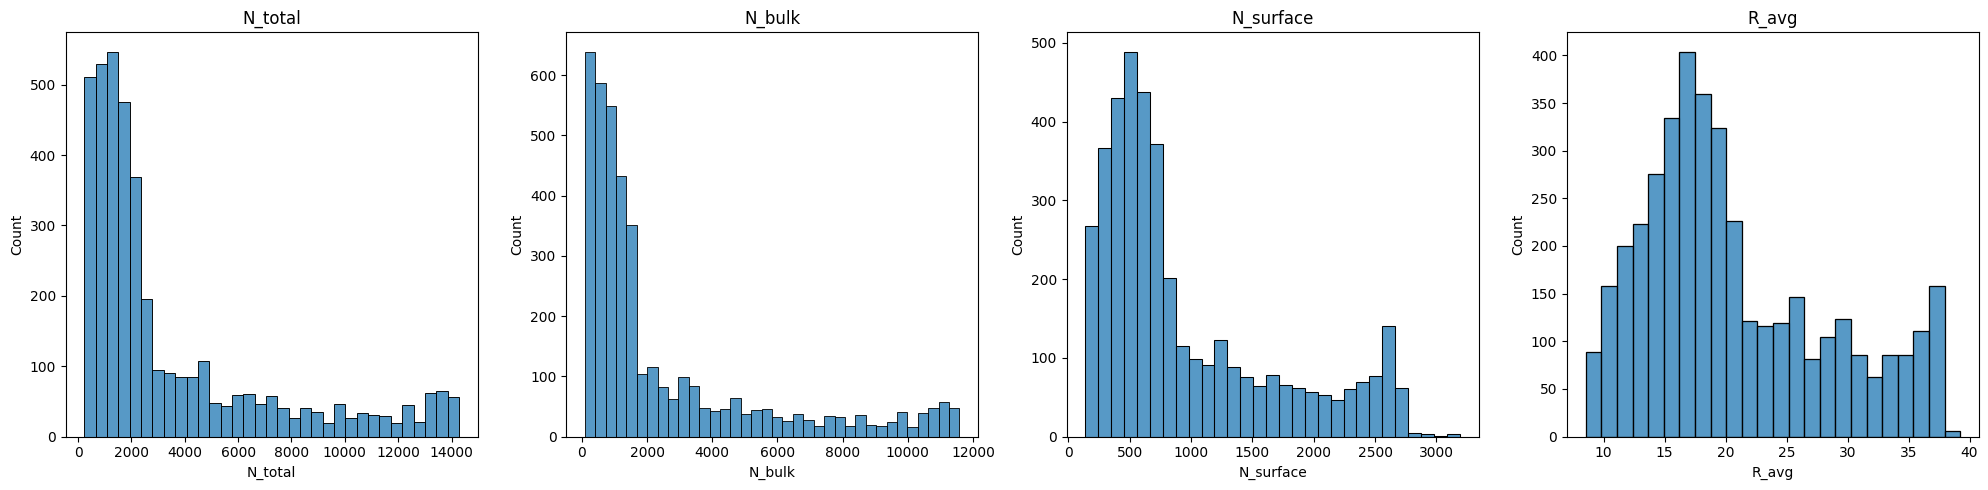

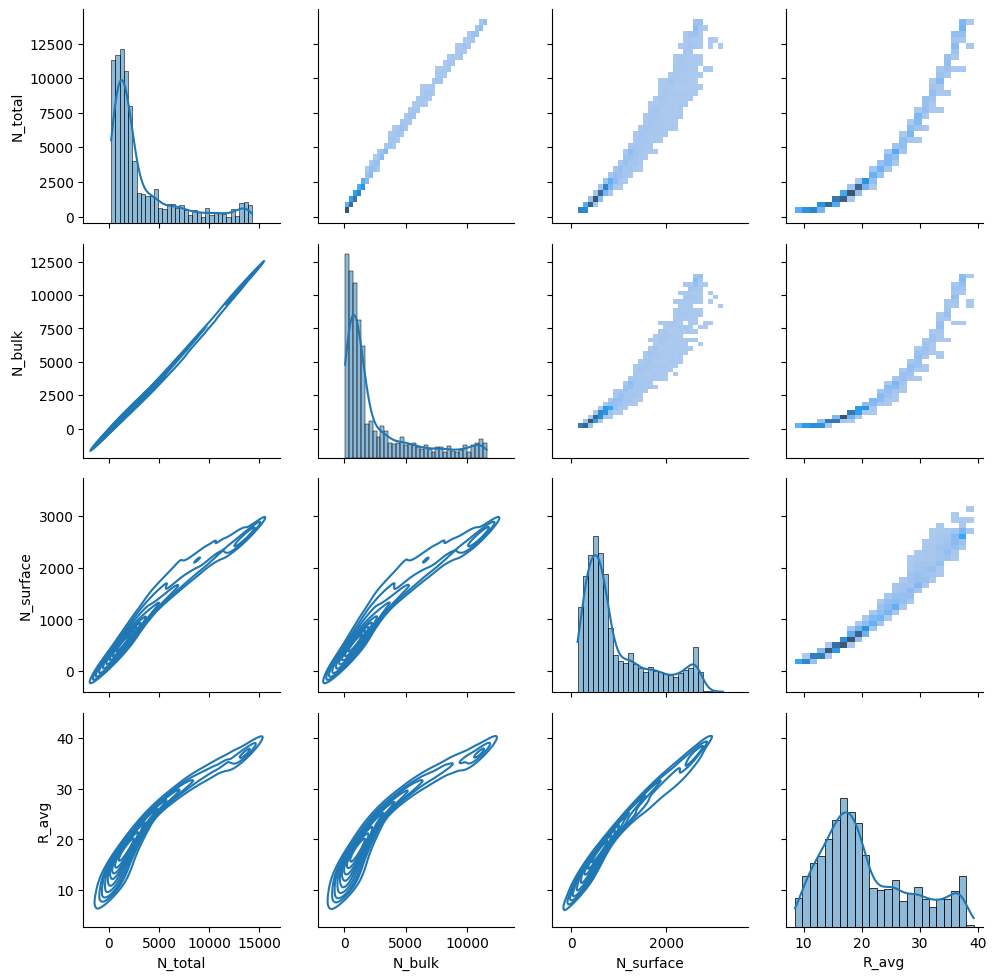

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = '/content/Au_nanoparticle_dataset.csv'
data = pd.read_csv(file_path)

# Create a new DataFrame by filtering the relevant columns
features = ['N_total', 'N_bulk', 'N_surface', 'R_avg']
new_df = data[features]

# Display the first 20 samples of this DataFrame
first_20_samples = new_df.head(20)
print("First 20 samples of the dataframe:")
print(first_20_samples)

# Calculate mean, standard deviation, and quartile values for each feature
statistics = new_df.describe().loc[['mean', 'std', '25%', '50%', '75%']]
print("\nStatistics (Mean, Std, Quartiles) for each feature:")
print(statistics)

# Step 4: Plot histograms for each feature
plt.figure(figsize=(20, 5))
for i, column in enumerate(new_df.columns, 1):
    plt.subplot(1, 4, i)
    sns.histplot(new_df[column], kde=False)
    plt.title(column)

plt.tight_layout()
plt.show()

# Visualize scatter plots and histograms using pairplot, with modifications

# Create a PairGrid object
g = sns.PairGrid(new_df)

# Bivariate histogram on the upper part
g.map_upper(sns.histplot)

# Histogram and KDE on the diagonal
g.map_diag(sns.histplot, kde=True)

# Bivariate KDE on the lower part
g.map_lower(sns.kdeplot)

# Display the plots
plt.show()
